In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import get_variable_name, interactive_tuner


In [14]:
image = cv2.imread('../assets/else/sunset-lake-landscape-illustration-free-vector.jpg')
image = cv2.imread('../assets/internet/petri_net_5.png')
image = cv2.imread('../assets/local/simple_petri.jpg')
image = cv2.imread('../assets/local/complex_petri_1.jpg')
image = cv2.imread('../assets/local/complex_petri_2.png')

(225, 756)

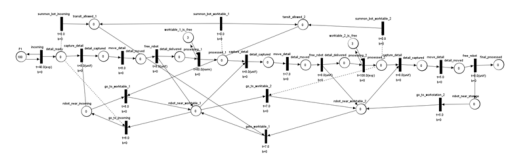

In [16]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_inverted = cv2.bitwise_not(image_gray)

plt.imshow(image_gray, cmap='gray')
plt.axis('off') 

image_gray.shape

In [18]:
def adaptive_gaussian(img, C=0):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, C)

interactive_tuner(adaptive_gaussian, image_gray)


### Testing different thresholding techniques

In [ ]:
# 1. Basic thresholding
_, basic_thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY)

# 2. Otsu's method
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 3. Adaptive thresholding
adaptive_mean = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                     cv2.THRESH_BINARY, 5, 2)
adaptive_gaussian = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

# Save the thresholded images to files
cv2.imwrite(f'../../assets/postprocessed/{get_variable_name(basic_thresh)}.png', basic_thresh)
cv2.imwrite(f'../../assets/postprocessed/{get_variable_name(otsu_thresh)}.png', otsu_thresh)
cv2.imwrite(f'../../assets/postprocessed/{get_variable_name(adaptive_mean)}.png', adaptive_mean)
cv2.imwrite(f'../../assets/postprocessed/{get_variable_name(adaptive_gaussian)}.png', adaptive_gaussian)


True

### Recommended by claude method for finding contours.

In [ ]:
# Load and prepare the image
image = cv2.imread('../../assets/local/complex_petri_2.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# STEP 1: Gaussian blur to reduce noise while preserving edges
# Use a small kernel to avoid blurring thin lines too much
# blurred = cv2.GaussianBlur(image_gray, (3, 3), 0)

# STEP 2: Adaptive thresholding with small block size
binary = cv2.adaptiveThreshold(image_gray, 255, 
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                              cv2.THRESH_BINARY_INV, 11, 2)

# STEP 3: Morphological operations to connect broken lines
kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# STEP 4: Find contours
contours, hierarchy = cv2.findContours(closing, cv2.RETR_LIST, 
                                     cv2.CHAIN_APPROX_SIMPLE)

# STEP 5: Draw contours for visualization
result = np.ones_like(image) * 255 #image.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 1)

cv2.imwrite('../../assets/postprocessed/temp.jpg', result)


print(f"Found {len(contours)} contours")

Found 131 contours


### Experimenting with matplotlib and opencv imshow

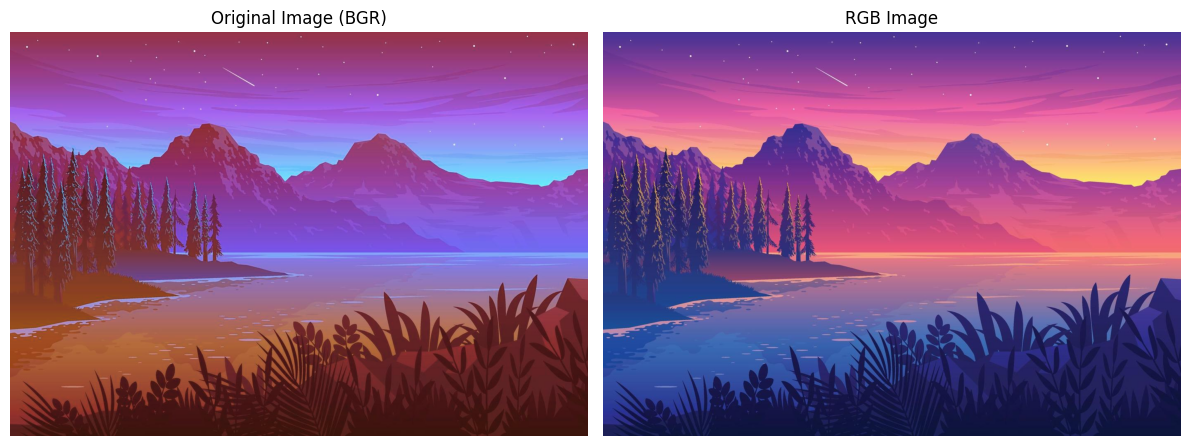

In [2]:
image = cv2.imread('../../assets/else/sunset-lake-landscape-illustration-free-vector.jpg')
img_converted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image)  # Convert BGR to RGB for correct display
plt.title('Original Image (BGR)')
plt.axis('off')

# Display converted RGB image
plt.subplot(1, 2, 2)
plt.imshow(img_converted)  # img_gray is already in RGB format
plt.title('RGB Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Display images using OpenCV instead of matplotlib

# Create named windows
cv2.namedWindow('Original Image (BGR)', cv2.WINDOW_NORMAL)
cv2.namedWindow('RGB Image', cv2.WINDOW_NORMAL)

# Resize windows (optional)
cv2.resizeWindow('Original Image (BGR)', 800, 600)
cv2.resizeWindow('RGB Image', 800, 600)

# Display the images
cv2.imshow('Original Image (BGR)', image)
cv2.imshow('RGB Image', img_converted)

# Wait for a key press (0 means wait indefinitely)
print("Press any key to close the windows")
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()

Press any key to close the windows
